[Reference](https://aaaquants.medium.com/how-to-calculate-profit-and-loss-p-ls-for-your-trading-strategies-python-for-financial-analysis-461f9206ce84)

In [1]:
import numpy as np
import pylab as plt

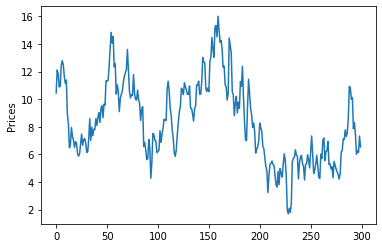

In [2]:
# Let's create an arbitrary price series from normally distributed random numbers. 
# Of course, you can replace this with your downloaded historical data. 
np.random.seed(28)
N = 300
rets = np.random.randn(N)
prices = np.cumsum(rets)+10
plt.plot(prices);
plt.ylabel('Prices');

In [3]:
# Current position. '0': not in position. '1': in long position. '-1': in short position
inpos = 0

# Positions
pos = []

# Prices 
px = []

# Realised PnL
rlzd = []

# Exit times
t = [] 

# Moving Average windows
MA = [3, 9]

In [4]:
for i in range(max(MA)+1, N):
    # The Moving Averages:
    ma1 = np.mean(prices[i-MA[0]:i])
    ma2 = np.mean(prices[i-MA[1]:i])
    
    pos.append(inpos)
    px.append(prices[i])

    if ma1 > ma2:
        if inpos != -1: # If we are not in a short position
            if inpos: # If we are in a long position, now we exit:
                rlzd.append(prices[i]-entry)
                # Record the exit times
                t.append(i)
            
            # Enter a short position
            entry = prices[i]
            inpos = -1

    else:
        if inpos != 1: # If we are not in a long position    
            if inpos:
                rlzd.append(entry-prices[i])
                t.append(i)

            # Enter a long position
            entry = prices[i]
            inpos = 1

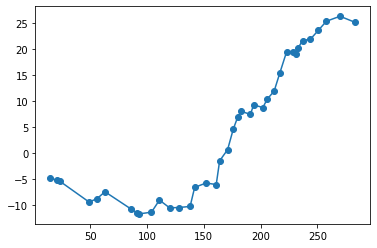

In [5]:
# Realised PnL
plt.plot(np.array(t)-max(MA)-2, np.cumsum(rlzd), '-o')

In [6]:
# Unrealised PnL
unrlzd = np.cumsum(np.multiply(np.diff(px), pos[1:]))

In [7]:
# Compare the final realised and the final unrealised PnL:
final_unrlzd = unrlzd[-1]
print(final_unrlzd, sum(rlzd))

24.281491112572287 25.16798661594224


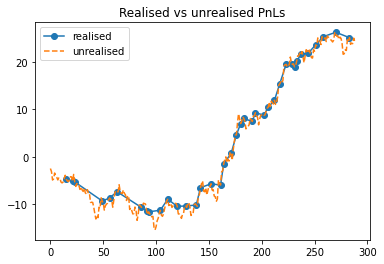

In [8]:
# Compare the realised and unrealised PnLs:
plt.plot(np.array(t)-max(MA)-2, np.cumsum(rlzd), '-o')
plt.plot(unrlzd,'--')
plt.title('Realised vs unrealised PnLs')
plt.legend(['realised', 'unrealised']);